In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# External class file
import nbimporter

from classes import MyStock

pd.options.display.float_format = '{:.2f}'.format

<center>
    <img src="images/Papa_John's_Logo_2019.svg" width="50%" />
</center>

<table>
    <tr>
        <th>Founder</th>
        <th>Headquarters</th>
        <th>Locations</th>
        <th>Founded</th>
    </tr>
    <tr align="center">
        <td>John Schnatter</td>
        <td>Cumberland, Georgia, U.S</td>        
        <td>5,400<br>(December 2020)</td>
        <td>October 2, 1984</td>
    </tr>
</table>

<table>
    <tr>
        <th>Exchange</th>
        <th>1st Trade Date</th>
        <th>Ticker</th>
    </tr>
    <tr align="center">
        <td>NASDAQ</td>
        <td>June 8, 1993</td>        
        <td>PZZA</td>
    </tr>
</table>

<center>
    <h3>Key Points</h3>
</center>


<ul>
    <li>
        Founded in 1984 when <em>"Papa"</em> John Schnatter knocked out a broom closet in the back of his father's tavern, Mick's  Lounge, in Jeffersonville, Indiana<br><br>
    </li>
    <li>
        Sold his 1971 Camaro Z28 to purchase US &#36;1,600 worth of used pizza equipment<br><br>
    </li>
    <li>
        Popularized eating pizza crust with dipping sauce<br><br>
    </li>
    <li>
        1994: 500 stores and 1997: 1,500 stores<br><br>
    </li>
    <li>
        In 2009, Schnatter bought the Camaro back after offering a reward of US &#36;250,000 for the car
       <center>
            <img src="images/YOUNGJOHNSCHNATTERCAMARO.jpeg" width="50%" />
        </center>
        <br><br>
    </li>
    <li>
        May 22, 2010: First ever <strong>Bitcoin</strong> transaction was made between Laszlo Hanyecz and  Jeremy Sturdivant (Papa John’s in Jacksonville, Florida) swapping 10,000 coins (US &#36;41) for 2 large pizza's and May 22nd is celebrated as "Bitcoin Pizza Day"
    </li>
</ul>


In [2]:
# Complete
pizza_cos = {
    "papa_johns": 1,
    "dominos": 2
}

my_stock = MyStock.MyStock()

<center><h2>Create <em>'company_df'</em> </h2>

In [3]:
# Complete
co_cols = ['Company_ID', 'Full_Name', 'Ticker', 'ex1', 'ex2', 'ex3', 'ex4']

company_df = my_stock.create_DF(co_cols, co_cols[0:3], 'data/stock_company.csv')

company_df

,Company_ID,Full_Name,Ticker
0,1,Papa John's,PZZA
1,2,Domino's Pizza,DPZ


<center>
    <h2>Create <em>'quotes_df'</em></h2>

In [4]:
# Complete
stock_cols = ['ID', 'str_date', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj_close', 'Volume', 'Created', 'Updated', 'Company_ID']

quotes_df = my_stock.create_DF(stock_cols, 'custom', 'data/stock_quotes.csv')

quotes_df

,Date,Open,High,Low,Close,Volume,Company_ID
0,2021-11-23,534.20,536.63,526.30,531.91,277800,2
1,2021-11-22,532.99,538.81,528.76,533.36,298800,2
2,2021-11-19,546.17,549.51,534.42,535.59,615400,2
3,2021-11-02,488.06,490.03,478.36,486.87,462500,2
4,2021-11-01,489.68,489.68,479.39,487.38,457100,2
...,...,...,...,...,...,...,...
11776,2021-12-16,132.68,132.78,128.00,129.03,247000,1
11777,2021-12-15,126.92,131.66,126.36,131.58,305300,1
11778,2021-12-14,127.88,129.49,126.90,128.14,417600,1
11779,2021-12-13,128.61,128.96,126.61,128.23,275400,1


<center>
    <h2>Merge Company &amp; Quote DF's</h2>

In [5]:
# Complete
pj_x_dom_df = pd.merge(company_df, quotes_df, on='Company_ID')

pj_x_dom_df.drop('Company_ID', axis=1, inplace=True)

pj_x_dom_df

,Full_Name,Ticker,Date,Open,High,Low,Close,Volume
0,Papa John's,PZZA,2021-11-29,128.90,130.19,126.00,126.21,418800
1,Papa John's,PZZA,2021-11-26,132.42,135.80,128.37,128.84,393800
2,Papa John's,PZZA,2021-11-24,128.53,133.95,128.53,133.84,328200
3,Papa John's,PZZA,2021-11-23,130.53,132.23,128.22,130.52,372400
4,Papa John's,PZZA,2021-11-22,132.54,134.37,129.90,130.50,342800
...,...,...,...,...,...,...,...,...
11776,Domino's Pizza,DPZ,2021-12-16,527.17,534.31,520.45,532.20,361200
11777,Domino's Pizza,DPZ,2021-12-15,510.92,525.40,507.44,523.92,515000
11778,Domino's Pizza,DPZ,2021-12-14,531.13,536.12,522.15,523.15,429600
11779,Domino's Pizza,DPZ,2021-12-13,533.40,540.96,530.49,537.36,448600


<center>
    <h2>Create Papa John's DF</h2>

In [6]:
# Complete

pj_ticker = pj_x_dom_df['Ticker'].loc[pj_x_dom_df['Full_Name'] == "Papa John's"].unique()

pj_df = pj_x_dom_df.loc[pj_x_dom_df['Ticker'] == pj_ticker[0]]

pj_df

,Full_Name,Ticker,Date,Open,High,Low,Close,Volume
0,Papa John's,PZZA,2021-11-29,128.90,130.19,126.00,126.21,418800
1,Papa John's,PZZA,2021-11-26,132.42,135.80,128.37,128.84,393800
2,Papa John's,PZZA,2021-11-24,128.53,133.95,128.53,133.84,328200
3,Papa John's,PZZA,2021-11-23,130.53,132.23,128.22,130.52,372400
4,Papa John's,PZZA,2021-11-22,132.54,134.37,129.90,130.50,342800
...,...,...,...,...,...,...,...,...
7283,Papa John's,PZZA,2021-12-16,132.68,132.78,128.00,129.03,247000
7284,Papa John's,PZZA,2021-12-15,126.92,131.66,126.36,131.58,305300
7285,Papa John's,PZZA,2021-12-14,127.88,129.49,126.90,128.14,417600
7286,Papa John's,PZZA,2021-12-13,128.61,128.96,126.61,128.23,275400


<center>
    <h2> Describe</h2>
</center>

In [7]:
# Complete

pj_df.describe()

,Open,High,Low,Close,Volume
count,7288.00,7288.00,7288.00,7288.00,7288.00
mean,28.14,28.56,27.73,28.15,725018.68
std,30.21,30.65,29.77,30.21,976514.70
min,2.00,2.06,1.89,1.94,900.00
25%,7.49,7.60,7.34,7.49,300575.00
50%,12.75,12.91,12.58,12.76,509200.00
75%,46.17,46.85,45.46,46.19,834450.00
max,138.30,140.68,134.57,140.01,36628800.00


<center>
    <h2><span>Find Duplicates &amp; Remove</span></h2>
    <img src="https://img.icons8.com/external-flat-juicy-fish/60/000000/external-duplicate-cyber-crime-flat-flat-juicy-fish.png"/>
    <hr>

In [8]:
# Complete

print(pj_df.loc[pj_df.duplicated() == True])

# Drop duplicate(s)
pj_df = pj_df.drop_duplicates()

pj_df.loc[pj_df.duplicated() == True]

        Full_Name Ticker        Date   Open   High    Low  Close  Volume
7287  Papa John's   PZZA  2021-12-10 130.75 130.97 127.78 128.34  189900


,Full_Name,Ticker,Date,Open,High,Low,Close,Volume


<center>
    <h3>First Trade Date</h3>

In [9]:
pj_df.loc[pj_df['Date'] == pj_df['Date'].min()]

,Full_Name,Ticker,Date,Open,High,Low,Close,Volume
44,Papa John's,PZZA,1993-06-08,2.00,2.06,1.89,1.94,16986600


<center>
    <h2>Create <em>year</em>, <em>month</em> &amp; <em>day of week</em></h2>

In [10]:
# Create Year
pj_df['Year'] = pd.DatetimeIndex(pj_df['Date'] ).year
sorted(pj_df['Year'].unique())

# Create Month
pj_df['Month'] = pd.DatetimeIndex( pj_df['Date'] ).month

## Day of the week
pj_df['Date'] = pd.to_datetime(pj_df['Date'])
pj_df['Date'] = pd.to_datetime(pj_df['Date'])
pj_df['DayOfWeek'] = pj_df['Date'].dt.day_name()

pj_df

/tmp/ipykernel_505627/874374530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pj_df['Year'] = pd.DatetimeIndex(pj_df['Date'] ).year
/tmp/ipykernel_505627/874374530.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pj_df['Month'] = pd.DatetimeIndex( pj_df['Date'] ).month
/tmp/ipykernel_505627/874374530.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,Full_Name,Ticker,Date,Open,High,Low,Close,Volume,Year,Month,DayOfWeek
0,Papa John's,PZZA,2021-11-29,128.90,130.19,126.00,126.21,418800,2021,11,Monday
1,Papa John's,PZZA,2021-11-26,132.42,135.80,128.37,128.84,393800,2021,11,Friday
2,Papa John's,PZZA,2021-11-24,128.53,133.95,128.53,133.84,328200,2021,11,Wednesday
3,Papa John's,PZZA,2021-11-23,130.53,132.23,128.22,130.52,372400,2021,11,Tuesday
4,Papa John's,PZZA,2021-11-22,132.54,134.37,129.90,130.50,342800,2021,11,Monday
...,...,...,...,...,...,...,...,...,...,...,...
7282,Papa John's,PZZA,2021-12-17,129.82,133.11,128.26,131.10,508800,2021,12,Friday
7283,Papa John's,PZZA,2021-12-16,132.68,132.78,128.00,129.03,247000,2021,12,Thursday
7284,Papa John's,PZZA,2021-12-15,126.92,131.66,126.36,131.58,305300,2021,12,Wednesday
7285,Papa John's,PZZA,2021-12-14,127.88,129.49,126.90,128.14,417600,2021,12,Tuesday


<center>
    <h2>Create DF's by <em>Year</em>, <em>Ticker</em>

In [11]:
pj_2015_df = my_stock.df_by_year(pj_df, 2015, 'PZZA')
pj_2016_df = my_stock.df_by_year(pj_df, 2016, 'PZZA')
pj_2017_df = my_stock.df_by_year(pj_df, 2017, 'PZZA')
pj_2018_df = my_stock.df_by_year(pj_df, 2018, 'PZZA')
pj_2019_df = my_stock.df_by_year(pj_df, 2019, 'PZZA')

# Pandemic
pj_2020_df = my_stock.df_by_year(pj_df, 2020, 'PZZA')
pj_2021_df = my_stock.df_by_year(pj_df, 2021, 'PZZA')

<center>
    <h2>HeatMap</h2>

On January 1, 2018, John Schnatter stepped down as CEO of Papa John's Pizza in favor of company President Steve Ritchie; Schnatter remained chairman. 

In February 2018, Papa John's and the **NFL** ended their sponsorship agreement after Schnatter's criticism of the NFL made headlines.

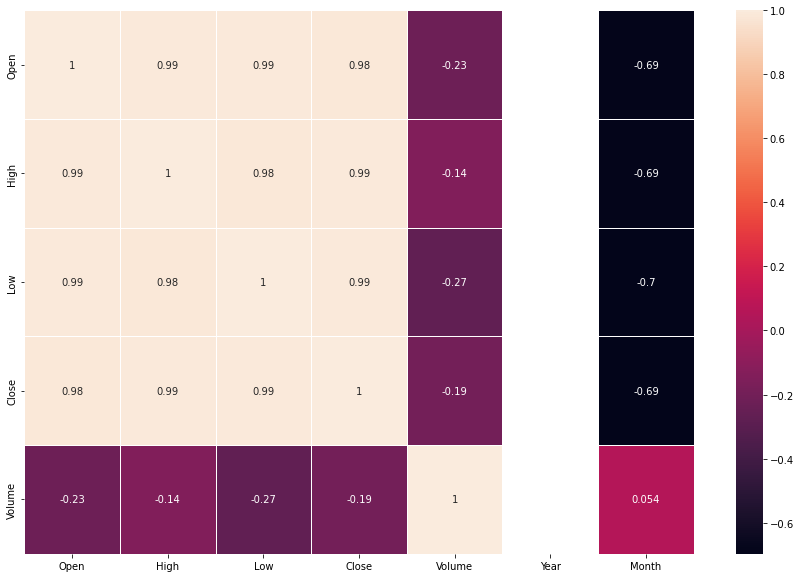

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(pj_2018_df.corr(method='pearson').drop(['Year', 'Month']), linewidths=.5, annot=True, ax=ax); # cmap="YlGnBu",
#sns.heatmap(pj_2019_df.corr(method='pearson').drop(['Year', 'Month']), linewidths=.5, annot=True, ax=ax); # cmap="YlGnBu",

<center>
    <h3>Plot a continous line by <em>Date &amp; Close Price (2015 - 2020)</h3>
</center>

July 11, 2018, news outlets reported that during a conference call with the marketing agency Laundry Service that was working under contract for Papa John's, Schnatter had used the word "n*****" by saying "*Colonel Sanders called blacks niggers and Sanders never faced public backlash.*" 

Schnatter said that referencing the quote by the KFC founder was meant to convey his dislike for racism. After the call, the owner of the marketing agency moved to end their contract with Papa John's. 

Schnatter resigned as chairman of the board on that day.

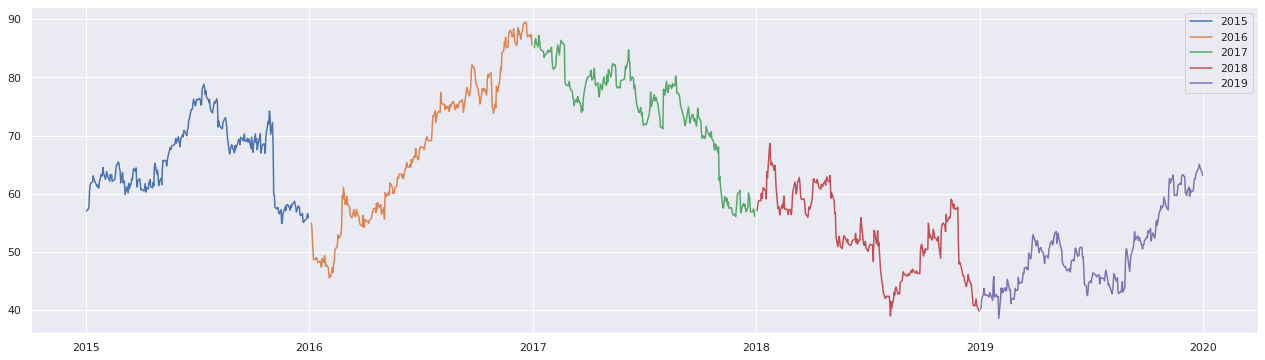

In [13]:
sns.set()
plt.figure(figsize=(22,6))

# Tuple of Df's by year to create our line
dfs_to_plot = (pj_2015_df, pj_2016_df, pj_2017_df, pj_2018_df, pj_2019_df)

my_stock.dfs_to_plt(dfs_to_plot, 'Date', 'Close')

plt.legend();
plt.show()

<center>
    Hmm, either I've discovered something new or maybe there are unsorted dates for 2020/21
    <img src="images/papa_unsort_plot.png" width="75%" />
</center>

<center>
    Yes that's it, there are unsorted date values
<center>

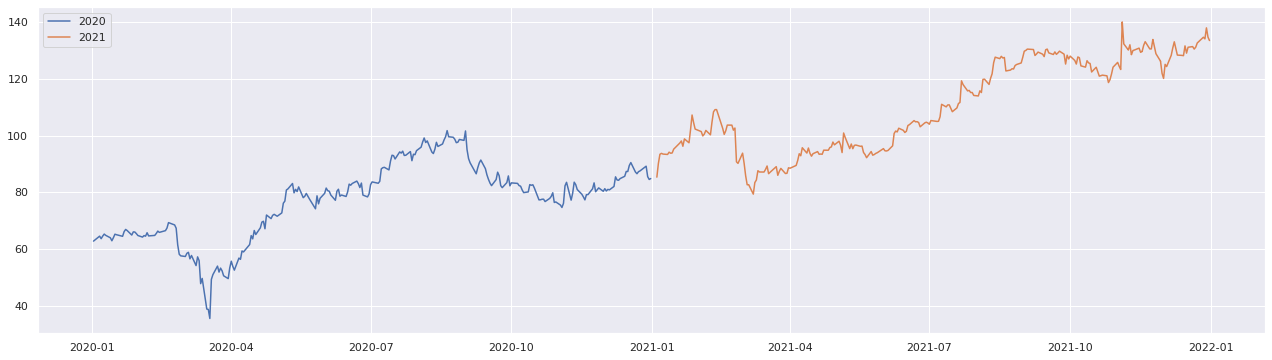

In [14]:
# Papa John's (2020, 2021)

plt.figure(figsize=(22,6))

#pj_2021_df = pj_2021_df.loc[sorted(pj_2021_df['Date'])]
#pj_2021_df.loc[sorted(pj_2021_df['Date'])]

pj_2021_df = pj_2021_df.sort_values(by='Date')

dfs_to_plot = (pj_2020_df, pj_2021_df)

my_stock.dfs_to_plt(dfs_to_plot, 'Date', 'Close')

plt.legend();

plt.show()

<center>
    <h1>Histogram 2015 - 2019</h1>
</center>

On July 26, 2018: John Schnatter filed a lawsuit against Papa John's Pizza to give him access to the company's internal books and records after they fired him from the company after the teleconference call scandal. 

He describes the company's procedures as an "unexplained and heavy-handed way" to cut ties between him and the company that he founded. 

In addition to preventing him from accessing information, the corporation also implemented a *poison pill strategy* in order to limit Schnatter's chances of buying back a majority stake in the company.

/home/vahuja/.local/lib/python3.8/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


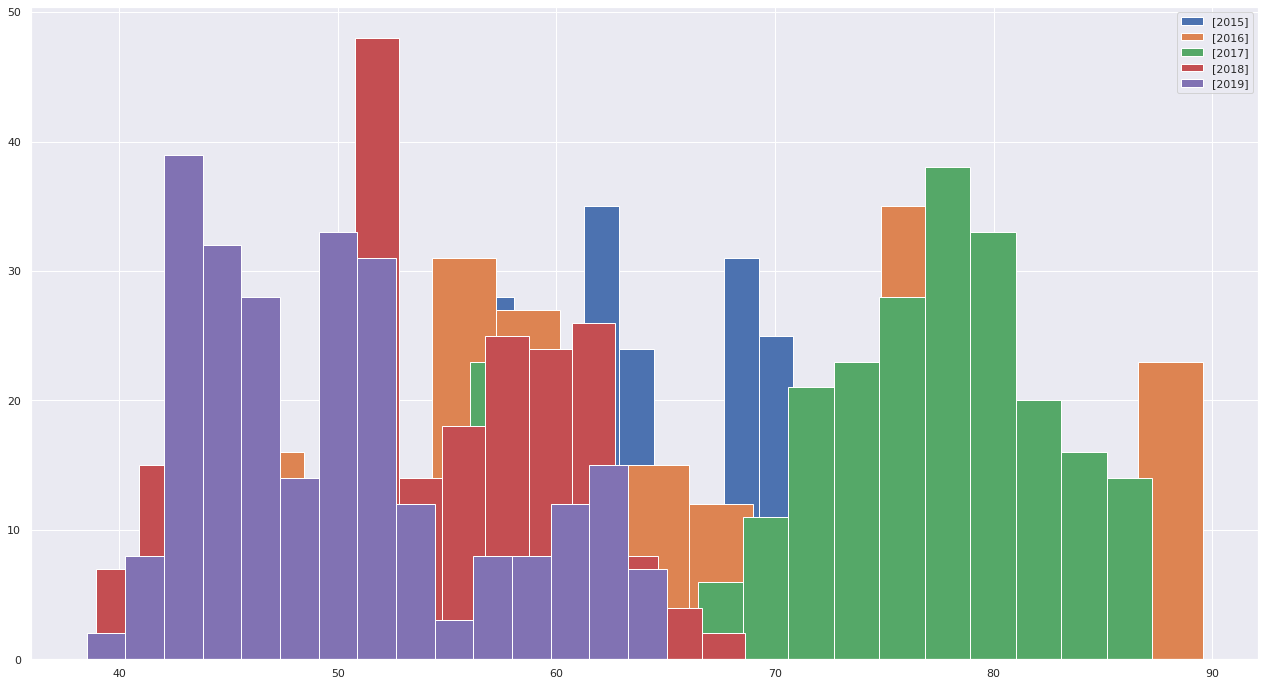

In [15]:
dfs_to_plot = (pj_2015_df, pj_2016_df, pj_2017_df, pj_2018_df, pj_2019_df)
col = 'Close'

my_stock.hist_to_plot(dfs_to_plot, col, 15, (22, 12));

<center>
    <h1>Histogram 2020 - 2021</h1>
</center>

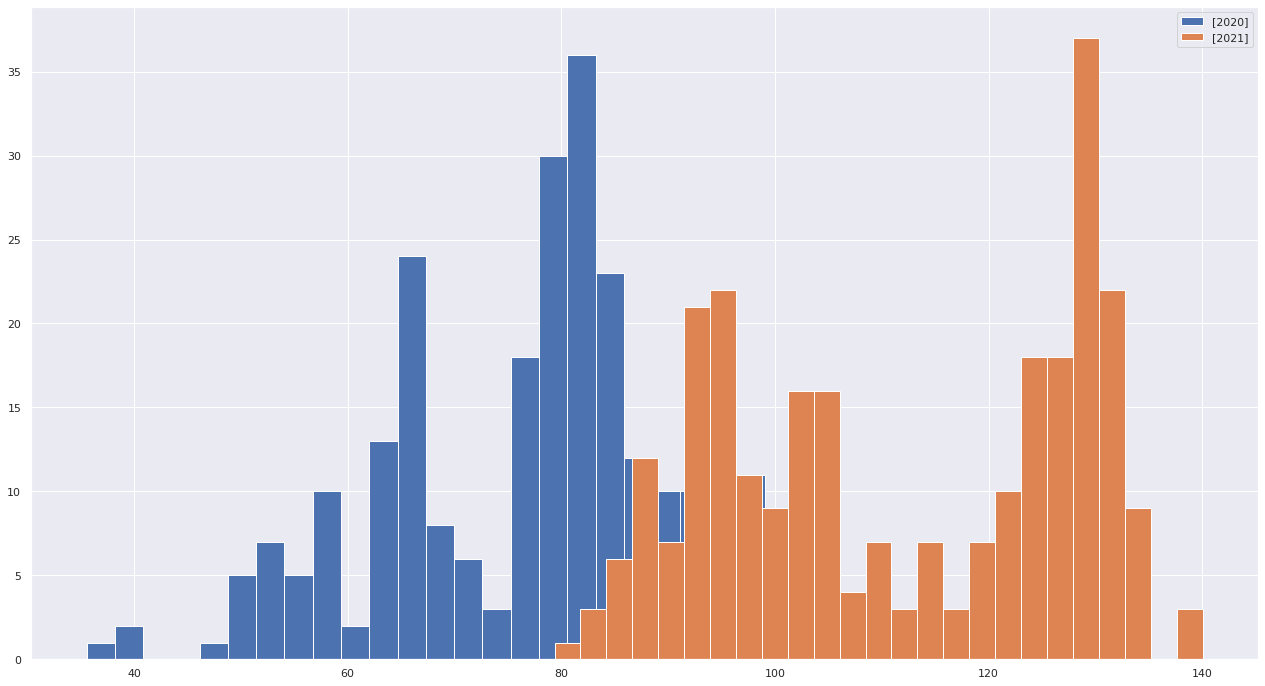

In [16]:
dfs_to_plot = (pj_2020_df, pj_2021_df)
col = 'Close'

my_stock.hist_to_plot(dfs_to_plot, col, 25, (22, 12));

On February 4, 2019: Hedge fund Starboard Value, would be investing US 200 million into Papa John's Pizza and possibly invest an additional $50 million by March 29, 2019.

*PMQ Pizza Magazine* reported that the company was the fourth-largest take-out and pizza delivery restaurant chain in the United States (based on 2019 sales (Technomic)).

Same time Starboard Value CEO Jeff Smith would become the new Papa John's chairman and that Anthony Sanfilippo, former CEO of the gaming company Pinnacle Entertainment, would be another addition to the company's board.

Following that announcement, Ritchie said that he hoped the deal would put an end to the ongoing feud with Schnatter, telling CNBC's David Faber, "Obviously, we're very hopeful that we can bring John along." However, Schnatter has expressed concerns that Ritchie is not the right executive for Papa John's.

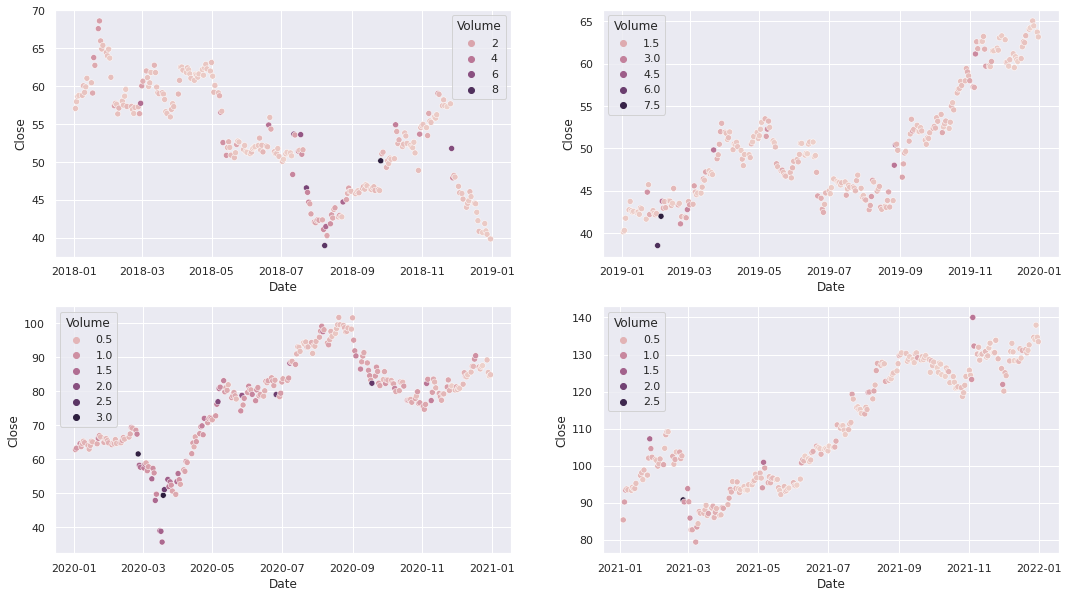

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.scatterplot(ax=axes[0,0], data=pj_2018_df, x="Date", y="Close", hue="Volume");

sns.scatterplot(ax=axes[0,1], data=pj_2019_df, x="Date", y="Close", hue="Volume");

sns.scatterplot(ax=axes[1,0], data=pj_2020_df, x="Date", y="Close", hue="Volume");

sns.scatterplot(ax=axes[1,1], data=pj_2021_df, x="Date", y="Close", hue="Volume");

### Aggregates

In [18]:

pj_2015OpenMedian    = pj_2015_df['Open'].median()
pj_2015MonthOpenMean = pj_2015_df['Open'].mean()
pj_2015MonthMin      = pj_2015_df['Open'].min()
pj_2015MonthMax      = pj_2015_df['Open'].max()
pj_2015MonthStd      = pj_2015_df['Open'].std()

print(f"Median: {pj_2015OpenMedian:.2f}, Mean: {pj_2015MonthOpenMean:.2f}, Min: {pj_2015MonthMin:.2f}, Max: {pj_2015MonthMax:.2f}, Std: {pj_2015MonthStd:.2f}")

var_open = 'Open'
pj_2015_df.agg({var_open : ['sum', 'min', 'max', 'std', 'mean']})

Median: 65.13, Mean: 65.75, Min: 54.70, Max: 78.84, Std: 5.99


,Open
sum,16568.05
min,54.70
max,78.84
std,5.99
mean,65.75


<center>
    <h3>DF By Month &amp; Describe</h3>
</center>

In [19]:
# Months
sorted(pj_2018_df['Month'].unique())

pj_2018Jan_df = pj_2018_df.loc[ pj_2018_df['Month'] == 1 ]
#pj_2018Jan_df.describe()

pj_2018Feb_df = pj_2018_df.loc[ pj_2018_df['Month'] == 2 ]
#pj_2018Feb_df.describe()

pj_2018Mar_df = pj_2018_df.loc[ pj_2018_df['Month'] == 3 ]
pj_2018Mar_df.describe()

,Open,High,Low,Close,Volume,Year,Month
count,21.00,21.00,21.00,21.00,21.00,21.00,21.00
mean,59.39,60.30,58.58,59.33,935195.24,2018.00,3.00
std,1.98,2.04,1.80,2.00,392706.54,0.00,0.00
min,55.95,57.05,55.68,55.93,615400.00,2018.00,3.00
25%,57.99,58.28,57.18,57.69,707500.00,2018.00,3.00
50%,59.33,60.37,58.60,59.13,766100.00,2018.00,3.00
75%,60.68,62.15,59.87,60.66,1027300.00,2018.00,3.00
max,63.00,63.72,61.54,62.77,2229800.00,2018.00,3.00


<center>
    <h3>Mean close by month</h3>
</center>

In [20]:
print(
    pj_2018Jan_df['Close'].mean(), 
    pj_2018Feb_df['Close'].mean(), 
    pj_2018Mar_df['Close'].mean()
)

62.06190504761904 57.967894947368414 59.326190571428576


<center>
    <h3>Plot mean by month for 2015 - 2019</h3>
</center>

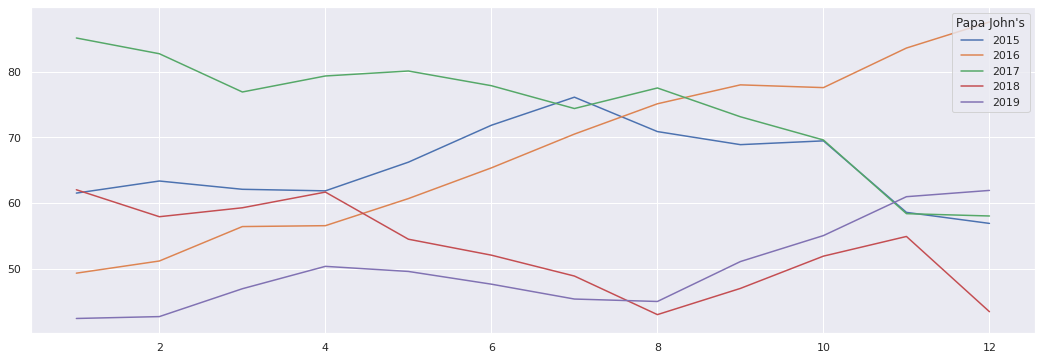

In [21]:
dfs_to_plot = (pj_2015_df, pj_2016_df, pj_2017_df, pj_2018_df, pj_2019_df)

plt.figure(figsize=(18,6))

pj_2015_mean = pj_2015_df.groupby('Month').mean()
pj_2016_mean = pj_2016_df.groupby('Month').mean()
pj_2017_mean = pj_2017_df.groupby('Month').mean()
pj_2018_mean = pj_2018_df.groupby('Month').mean()
pj_2019_mean = pj_2019_df.groupby('Month').mean()

plot_df = pd.DataFrame({
    '2015' : pj_2015_mean['Close'], 
    '2016' : pj_2016_mean['Close'], 
    '2017' : pj_2017_mean['Close'],
    '2018' : pj_2018_mean['Close'],
    '2019' : pj_2019_mean['Close'],
})

plt.plot(plot_df['2015'], label='2015')
plt.plot(plot_df['2016'], label='2016')
plt.plot(plot_df['2017'], label='2017')
plt.plot(plot_df['2018'], label='2018')
plt.plot(plot_df['2019'], label='2019')

plt.legend(title="Papa John's", loc='upper right')

plt;

<center>
    <h3>Plot mean by month for 2020, 2021</h3>
</center>

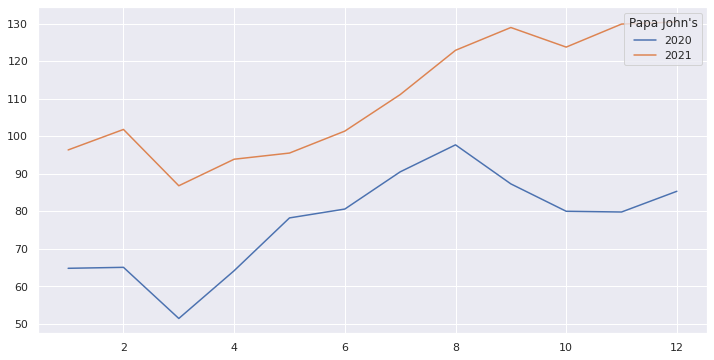

In [22]:
pj_2020_mean = pj_2020_df.groupby('Month').mean()
pj_2021_mean = pj_2021_df.groupby('Month').mean()

plt.figure(figsize=(12,6))

plot_df = pd.DataFrame({
    '2020' : pj_2020_mean['Close'], 
    '2021' : pj_2021_mean['Close']
})

plt.plot(plot_df['2020'], label="2020")
plt.plot(plot_df['2021'], label="2021")

plt.legend(title = "Papa John's", loc='upper right')

plt;

<center>
    <img src="images/shaqaroni.png" width="35%" />
</center>

2020: ***Shaq-a-Roni***, an extra, extra-large pizza is introduced.

It is topped with extra cheese and extra pepperoni, rumored to have a total of 66 slices of pepperoni cut into 8 Shaq sized slices.

&dollar;1 of each sale is donated to charities of Shaq's choosing.
    



### Bar

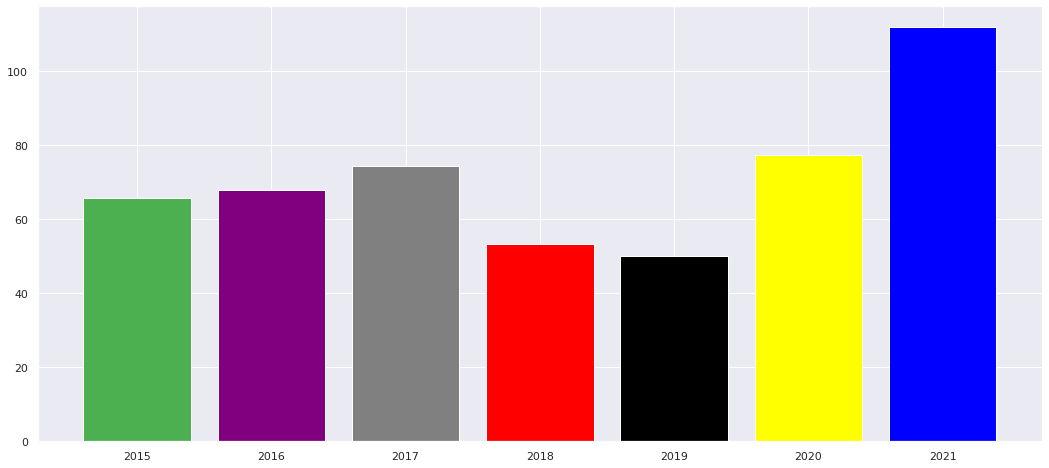

In [23]:
plt.figure(figsize=(18, 8))

x = ["2015", "2016", "2017", "2018", "2019", "2020", "2021"]
y = [
    pj_2015_df['Close'].mean(), 
    pj_2016_df['Close'].mean(), 
    pj_2017_df['Close'].mean(), 
    pj_2018_df['Close'].mean(), 
    pj_2019_df['Close'].mean(),
    pj_2020_df['Close'].mean(),
    pj_2021_df['Close'].mean(),
]


plt.bar(x,y, color = ["#4CAF50", 'purple', 'grey', 'red',  '#000', 'yellow', 'blue'])

plt.show()

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/Papa_Johns_corporate_HQ_in_Cumberland%2C_Cobb_County%2C_GA.jpg/800px-Papa_Johns_corporate_HQ_in_Cumberland%2C_Cobb_County%2C_GA.jpg" width="35%" />
</center>
In September 2020, Papa John's announced plans to establish a new headquarters in the Atlanta metropolitan area. In November, the company announced its new global headquarters would be located in Three Ballpark Center at The Battery Atlanta.


<center>
    <h3>Mean Open/Close/High/Low by Month (2015)</h3>
</center>

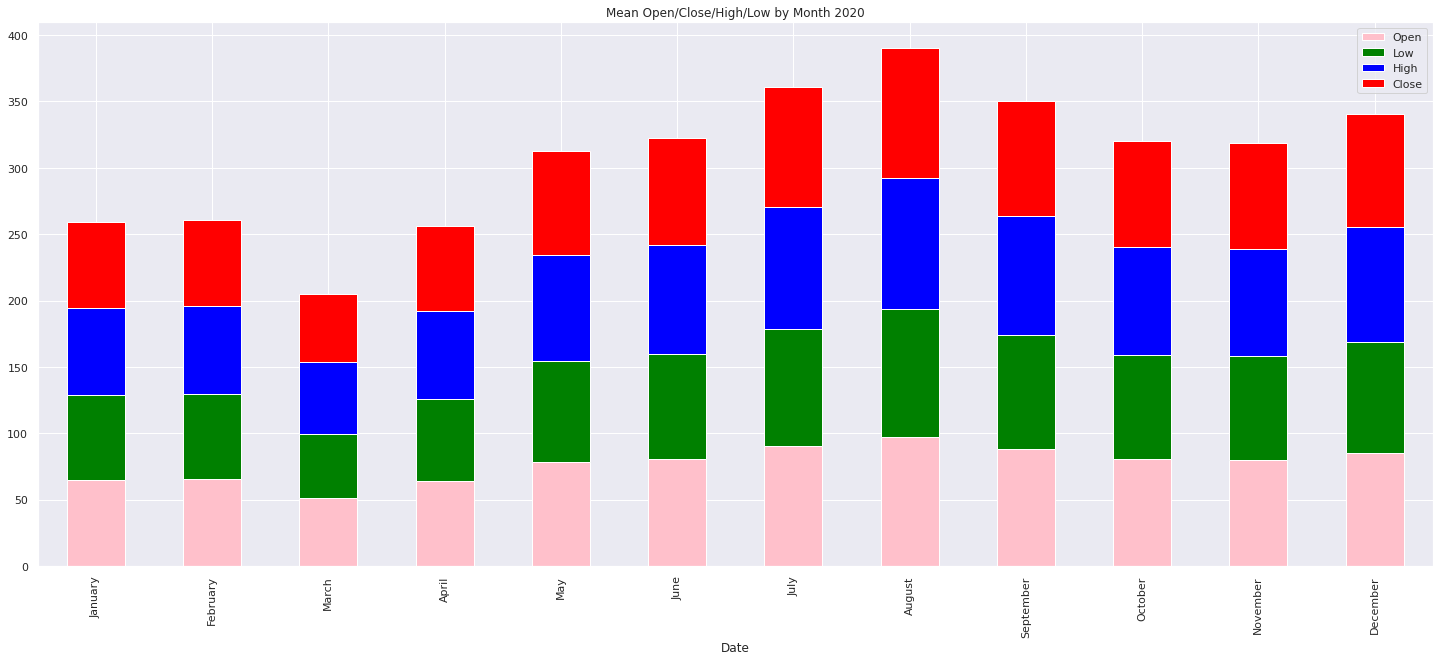

In [24]:
# Cols to stack
cols_to_plot = {
    'Open': [],
    'Low':  [],
    'High': [],
    'Close':[]
}

# Get unique months
unique_months = pj_2020_df['Month'].unique()

# Month by name
month_name = pd.DatetimeIndex( pj_2020_df['Date'] ).month_name().unique()

# prepare our data for the the DataFrame
for un_m in unique_months:
    for col_key, col_vals_list in cols_to_plot.items():
        col_vals_list.append(pj_2020_df[col_key].loc[pj_2020_df['Month'] == un_m].mean())

# Create DF from dict
df_2020_open_close = pd.DataFrame(
    cols_to_plot,
    index=month_name
)

# Plot
df_2020_open_close.plot(kind='bar', stacked=True, color=['pink', 'green', 'blue', 'red'], figsize=(25,10));
plt.title('Mean Open/Close/High/Low by Month ' + str(pj_2020_df['Year'].unique()[0]));

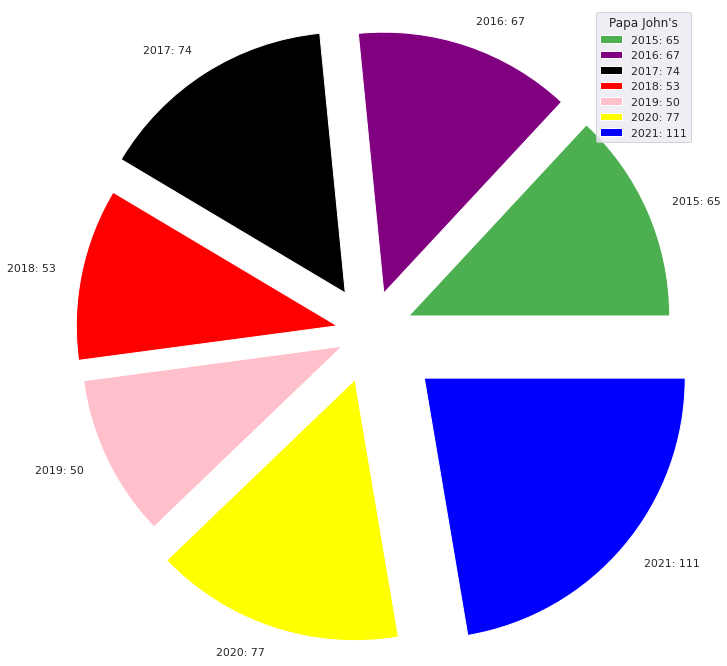

In [25]:
# Df's by year to plot mean values
dfs_to_plot = (pj_2015_df, pj_2016_df, pj_2017_df, pj_2018_df, pj_2019_df, pj_2020_df, pj_2021_df)

mean_close_values, pie_label, pie_explode = my_stock.get_mean_values_by_year(dfs_to_plot)

#np_zeros = np.zeros( len(dfs_to_plot))

# break parts
exploded = [float('0.' + str(int(pie_part / 4 ))) for pie_part in pie_explode]

plt.figure(figsize=(12,12))

plt.pie(
    mean_close_values, 
    labels = pie_label, 
    explode=exploded, 
    colors = ["#4CAF50", 'purple', '#000', 'red',  'pink', 'yellow', 'blue']
)

plt.legend(title = 'Papa John\'s')

plt.show()

['Friday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
[77.970001, 78.839996, 78.239998, 77.089996, 77.699997]


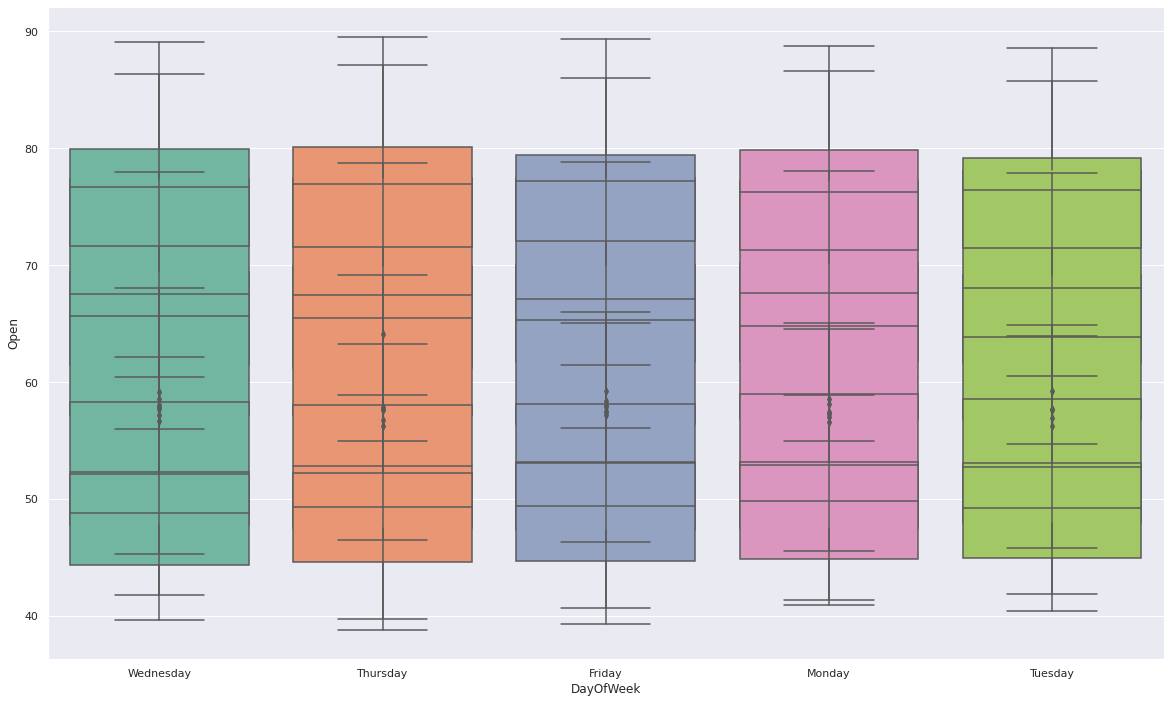

In [26]:
#sns.set(style = 'whitegrid')
#sns.boxplot(x='Date', y='Close', data=pj_2015_df);

dict_day_max_price = {}

days = pj_2015_df['DayOfWeek'].unique()
#days= [1,2,3,4,5]
print(days)

list_maxprice = []
for day in days:
    #print(day)
    #dict_day_max_price[day] = pj_2015_df['Close'].loc[pj_2015_df['DayOfWeek'] == day  ].max()
    list_maxprice.append(pj_2015_df['Close'].loc[pj_2015_df['DayOfWeek'] == day  ].max())
    #print(dict_day_max_price[day])
    
print(list_maxprice)

pj_2015_byday = pd.DataFrame(
    data = {
            'Day' : days, 
            'Max_Price' : list_maxprice 
           }
)

pj_2015_byday

#sns.set_theme(style="whitegrid")

sns.set_style('darkgrid')
plt.figure(figsize=(20,12))
sns.set_palette('Set2')
sns.boxplot(data=pj_2015_df, x='DayOfWeek', y='Open')
sns.boxplot(data=pj_2016_df, x='DayOfWeek', y='Open')
sns.boxplot(data=pj_2017_df, x='DayOfWeek', y='Open')
sns.boxplot(data=pj_2018_df, x='DayOfWeek', y='Open')
sns.boxplot(data=pj_2019_df, x='DayOfWeek', y='Open')
#sns.boxplot(data=pj_2020_df, x='DayOfWeek', y='Open')
plt.show()

#ax = sns.boxplot(x='Day', y='Max_Price')

### Cuts

In [27]:
# Group by cuts/qcuts
# Todo....

cols_to_include = [
    'Open',
    'High',
    'Low',
    'Close',
    'Volume'
]

pj_df[cols_to_include].groupby( pd.cut( pj_df['Close'], bins=list(range(0, 11)) ) ).mean()
pd.cut( pj_df.Close, bins=list(range(0,11)))

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7282    NaN
7283    NaN
7284    NaN
7285    NaN
7286    NaN
Name: Close, Length: 7287, dtype: category
Categories (10, interval[int64, right]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] ... (6, 7] < (7, 8] < (8, 9] < (9, 10]]

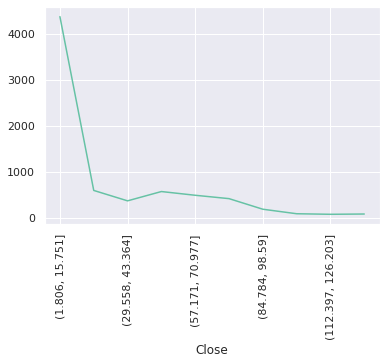

In [28]:
# Todo ...
# Cuts 
close_bins = pj_df.groupby(pd.cut(pj_df.Close, 10)).size()
close_bins.plot(rot=90);

In [29]:
# Cuts - quartiles
pj_df.groupby(pd.cut(pj_df.Close, 4)).size()

Close
(1.806, 36.461]      5134
(36.461, 70.977]     1280
(70.977, 105.494]     678
(105.494, 140.01]     195
dtype: int64

### Regplot

<AxesSubplot:xlabel='Close', ylabel='Open'>

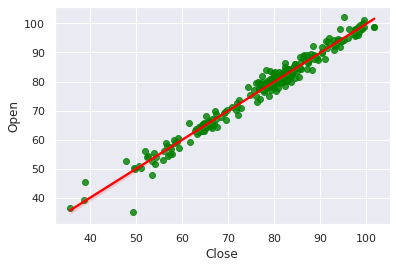

In [30]:
sns.regplot(x='Close', y='Open', data=pj_2020_df, scatter_kws={"color": "green"}, line_kws={"color": "red"})

*References:*
- https://www.dailymail.co.uk/news/article-10613711/American-boss-190-Papa-Johns-pizza-stores-defends-decision-stay-open-Russia.html
- https://en.wikipedia.org/wiki/Papa_John%27s#History
- https://www.pmq.com/john-schnatters-five-ingredients-to-pizza-success
- https://www.pennlive.com/food/2020/06/shaquille-oneal-launches-shaq-a-roni-pizza-with-papa-johns.html
- https://www.sportscasting.com/papa-johns-founder-john-schnatter-rips-roger-goodell-explosive-interview/